In [2]:
from sklearn.datasets import load_breast_cancer 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import cross_val_score 
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np

In [4]:
data = load_breast_cancer()

In [5]:
data.data.shape

(569, 30)

In [6]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [7]:
rfc = RandomForestClassifier(n_estimators=100,random_state=90) 
score_pre = cross_val_score(rfc,data.data,data.target,cv=10).mean()

score_pre

0.9648809523809524

0.9631265664160402 71


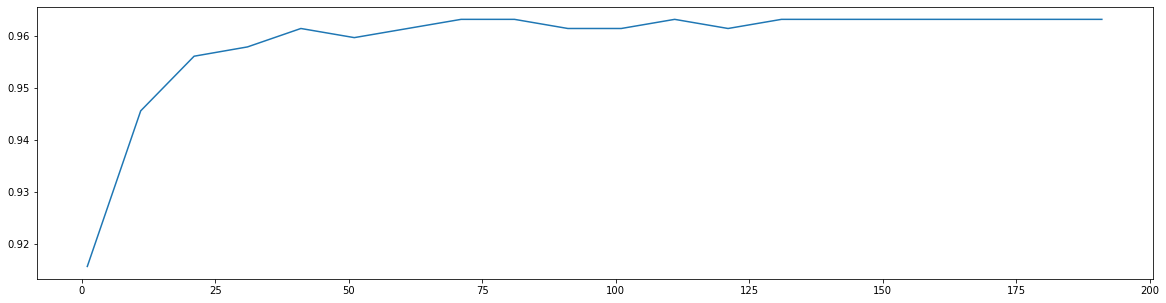

In [9]:
scorel = [] 
for i in range(0,200,10):
    rfc = RandomForestClassifier(n_estimators=i+1,
                                 n_jobs=-1, 
                                 random_state=90)
    score = cross_val_score(rfc,data.data,data.target,cv=10).mean()    
    scorel.append(score) 

print(max(scorel),(scorel.index(max(scorel))*10)+1) 
plt.figure(figsize=[20,5]) 
plt.plot(range(1,201,10),scorel) 
plt.show()

0.9666353383458647 73


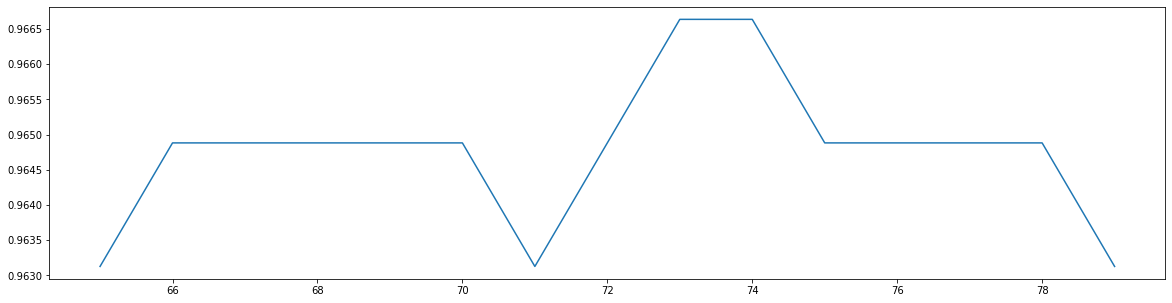

In [13]:
scorel = [] 
for i in range(65,80,1):
    rfc = RandomForestClassifier(n_estimators=i,
                                 n_jobs=-1, 
                                 random_state=90)
    score = cross_val_score(rfc,data.data,data.target,cv=10).mean()    
    scorel.append(score) 

print(max(scorel),(scorel.index(max(scorel))+65)) 
plt.figure(figsize=[20,5]) 
plt.plot(range(65,80,1), scorel) 
plt.show()

In [14]:
#调整max_depth

param_grid = {'max_depth':np.arange(1, 20, 1)}

# # #一般根据数据的大小来进行一个试探，乳腺癌数据很小，所以可以采用1~10，或者1~20这样的试探 但对于像digit recognition那样的大型数据来说，我们应该尝试30~50层深度（或许还不足够 更应该画出学习曲线，来观察深度对模型的影响

rfc = RandomForestClassifier(n_estimators=73 ,random_state=90) 
GS = GridSearchCV(rfc,param_grid,cv=10) 
GS.fit(data.data,data.target)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_estimators=73, random_state=90),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [15]:
GS.best_params_

{'max_depth': 8}

In [16]:
GS.best_score_

0.9666353383458647

In [23]:
param_grid={'min_samples_leaf':np.arange(1, 1+10, 1)}

#对于min_samples_split和min_samples_leaf,一般是从他们的最小值开始向上增加10或20 #面对高维度高样本量数据，如果不放心，也可以直接+50，对于大型数据，可能需要200~300的范围 #如果调整的时候发现准确率无论如何都上不来，那可以放心大胆调一个很大的数据，大力限制模型的复杂度

rfc = RandomForestClassifier(n_estimators=73
                            ,random_state=90 ) 
GS = GridSearchCV(rfc,param_grid,cv=10) 
GS.fit(data.data,data.target)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_estimators=73, random_state=90),
             param_grid={'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])})

In [24]:
GS.best_params_
GS.best_score_

0.9666353383458647

In [25]:
#调整min_samples_split
param_grid={'min_samples_split':np.arange(2, 2+20, 1)}
rfc = RandomForestClassifier(n_estimators=73
                             ,random_state=90 ) 
GS = GridSearchCV(rfc,param_grid,cv=10) 
GS.fit(data.data,data.target)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_estimators=73, random_state=90),
             param_grid={'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21])})

In [26]:
GS.best_params_
GS.best_score_

0.9666353383458647

In [27]:
param_grid = {'criterion':['gini', 'entropy']}
rfc = RandomForestClassifier(n_estimators=73
                             ,random_state=90 ) 
GS = GridSearchCV(rfc,param_grid,cv=10) 
GS.fit(data.data,data.target)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_estimators=73, random_state=90),
             param_grid={'criterion': ['gini', 'entropy']})

In [28]:
GS.best_params_
GS.best_score_

0.9666353383458647

In [29]:
rfc = RandomForestClassifier(n_estimators=73,random_state=90) 
score = cross_val_score(rfc,data.data,data.target,cv=10).mean() 
score

0.9666353383458647

In [30]:
score - score_pre

0.0017543859649122862